# Conway's Game of Life

### The Rules

* **Underpopulation**: If a live cell has fewer than 2 live neighbors, it dies
* **Stasis**: If a live cell has 2 or 3 live neighbors, it lives
* **Overpopulation**: If a live cell has more than 3 live neighbors, it dies
* **Reproduction**: If a dead cell has exactly 3 live neighbors, it becomes a live cell

In [148]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import numpy as np
from IPython.display import HTML

In [237]:
def generation(frameNum, img, universe, universe_size):
    new_universe = universe.copy()

    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            new_universe[i, j] = apply_rules(i, j, universe, universe_size)
            
            
    img.set_data(new_universe)
    universe = new_universe
    return img, 


def apply_rules(i, j, universe, universe_size):
    
    # Toroidal boundary conditions
    N = universe_size
    num_neighbors = int((universe[i, (j-1)%N] + universe[i, (j+1)%N] + 
                         universe[(i-1)%N, j] + universe[(i+1)%N, j] + 
                         universe[(i-1)%N, (j-1)%N] + universe[(i-1)%N, (j+1)%N] + 
                         universe[(i+1)%N, (j-1)%N] + universe[(i+1)%N, (j+1)%N]))
    neighbors.append(num_neighbors)
    
    # Apply rules
    if universe[x, y] and not 2 <= num_neighbors <= 3:
        return 0
    elif num_neighbors == 3:
        return 1
    return universe[x, y]



def random_universe(universe_size):
    return np.random.choice([0, 1], size=(universe_size,universe_size), p=[0.2, 0.8])


def add_glider(i, j, universe):
    glider = np.array([[0, 0, 1],
                       [1, 0, 1],
                       [0, 1, 1]])
    universe[i : i + 3, j : j + 3] = glider
    return universe

In [240]:
universe_size = 100
universe = random_universe(universe_size)
neighbors = []
#universe = add_glider(1,1,universe)

# np.random.randint(low=0, high=2, size=(universe_size, universe_size))

fig, ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
plt.axis("off")
# ims = []

# for i in range(2):
#     universe = generation(universe)
#     ims.append((plt.imshow(universe),))

img = ax.imshow(universe, interpolation='nearest')
universe_animation = animation.FuncAnimation(fig, generation, fargs=(img, universe, universe_size, ),
                                               frames=10,
                                               interval=50,
                                               save_count=50)

#universe_animation.save("test.mp4", fps=30, extra_args=['-vcodec', 'libx264'])
plt.close()

In [239]:
HTML(universe_animation.to_html5_video())

In [ ]:
def generation(universe):
    new_universe = universe.copy()

    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            new_universe[i, j] = apply_rules(i, j, universe)
    return new_universe


def apply_rules(i, j, universe):
    # Toroidal boundary conditions
    N = 10
    num_neighbors = int((universe[i, (j-1)%N] + universe[i, (j+1)%N] + 
                         universe[(i-1)%N, j] + universe[(i+1)%N, j] + 
                         universe[(i-1)%N, (j-1)%N] + universe[(i-1)%N, (j+1)%N] + 
                         universe[(i+1)%N, (j-1)%N] + universe[(i+1)%N, (j+1)%N]))
    neighbors.append(num_neighbors)
    # Apply rules
    if universe[x, y] and not 2 <= num_neighbors <= 3:
        return 0
    elif num_neighbors == 3:
        return 1
    return universe[x, y]



def random_universe(universe_size):
    return np.random.choice([0, 1], size=(universe_size,universe_size), p=[0.2, 0.8])


def add_glider(i, j, universe):
    glider = np.array([[0, 0, 1],
                       [1, 0, 1],
                       [0, 1, 1]])
    universe[i : i + 3, j : j + 3] = glider
    return universe

In [ ]:
universe_size = 10
universe = random_universe(universe_size)
neighbors = []
#universe = add_glider(1,1,universe)

# np.random.randint(low=0, high=2, size=(universe_size, universe_size))

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
plt.axis("off")
ims = []

for i in range(2):
    universe = generation(universe)
    ims.append((plt.imshow(universe),))

universe_animation = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat=False)
plt.close()

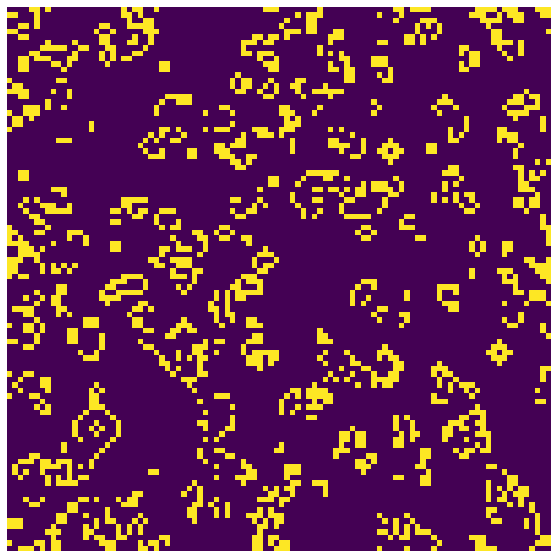

In [236]:
import sys, argparse
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

ON = 255
OFF = 0
vals = [ON, OFF]

def randomGrid(N):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def addGlider(i, j, grid):
    """adds a glider with top left cell at (i, j)"""
    glider = np.array([[0,    0, 255], 
                       [255,  0, 255], 
                       [0,  255, 255]])
    grid[i:i+3, j:j+3] = glider

def addGosperGliderGun(i, j, grid):
    """adds a Gosper Glider Gun with top left cell at (i, j)"""
    gun = np.zeros(11*38).reshape(11, 38)

    gun[5][1] = gun[5][2] = 255
    gun[6][1] = gun[6][2] = 255

    gun[3][13] = gun[3][14] = 255
    gun[4][12] = gun[4][16] = 255
    gun[5][11] = gun[5][17] = 255
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 255
    gun[7][11] = gun[7][17] = 255
    gun[8][12] = gun[8][16] = 255
    gun[9][13] = gun[9][14] = 255

    gun[1][25] = 255
    gun[2][23] = gun[2][25] = 255
    gun[3][21] = gun[3][22] = 255
    gun[4][21] = gun[4][22] = 255
    gun[5][21] = gun[5][22] = 255
    gun[6][23] = gun[6][25] = 255
    gun[7][25] = 255

    gun[3][35] = gun[3][36] = 255
    gun[4][35] = gun[4][36] = 255

    grid[i:i+11, j:j+38] = gun

def update(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line 
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neghbor sum
            # using toroidal boundary conditions - x and y wrap around 
            # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j]  == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    
    ims.append([plt.imshow(newGrid)])
    return img,

# main() function
# set grid size
N = 100
updateInterval = 50
# declare grid
grid = np.array([])
grid = randomGrid(N)

ims = []

# set up animation
fig, ax = plt.subplots(figsize=(10,10))
plt.axis("off")
img = ax.imshow(grid, cmap="Greys", interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                              frames = 10,
                              interval=updateInterval,
                              save_count=50)

# # of frames? 
# set output file

ani.save("test2.mp4", fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [226]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
plt.axis("off")

universe_animation = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat=True)
plt.close()

In [227]:
HTML(universe_animation.to_html5_video())